In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## MCAR (Missing Completely at Random)

### No relationship between the data missing and any other values

In [2]:
data = pd.read_csv("data/titanic.csv", delimiter=",")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


## MNAR (Missing not at Random)
### There is some relationship between the data missing and any other values

In [8]:
data['Cabin_null'] = np.where(data['Cabin'].isnull(), 1, 0)

data['Cabin_null'].mean()*100

77.10437710437711

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [10]:
data['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int64

In [12]:
data.groupby('Survived')['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

## MAR (Missing at Random)

### the missing values are at random by the data not being provided

### Types of techniques to handle missing values

- Mean / Median / Mode Imputation
- Capturing NAN values with a new feature column + Frequent Category Imputation / Median / Mode/ Mean
- Random Sample Imputation
- End of Distribution Imputation
- Arbitrary Imputation
- Frequent Category Imputation
- KNN Imputation
- Iterative Imputation
- new label for missing values Imputation

### Handling missing values:
- Delete the rows
- Use Unsupervised ML Algorithms
- Use Supervised ML Algorithms
- Replace with frequenct values


### Mean / Median / Mode Imputation (MCAR)

In [47]:
data_titanic = pd.read_csv("data/titanic.csv", delimiter=',', usecols=['Age','Fare','Survived'])
data_titanic.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [48]:
data_titanic.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [51]:
median_value = data_titanic.Age.median()
mean_value = data_titanic.Age.mean()
mode_value = data_titanic.Age.mode()

In [52]:
def impute_nan(data, variable,value,info):
    data[variable + info] = data[variable].fillna(value)


In [53]:
impute_nan(data_titanic,'Age',median_value,'_median')
impute_nan(data_titanic,'Age',mean_value,'_mean')
impute_nan(data_titanic,'Age',mode_value,'_mode')
data_titanic.head(3)

,Survived,Age,Fare,Age_median,Age_mean,Age_mode
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0


In [54]:
print(data_titanic['Age'].std())
print(data_titanic['Age_median'].std())

14.526497332334042
13.019696550973201


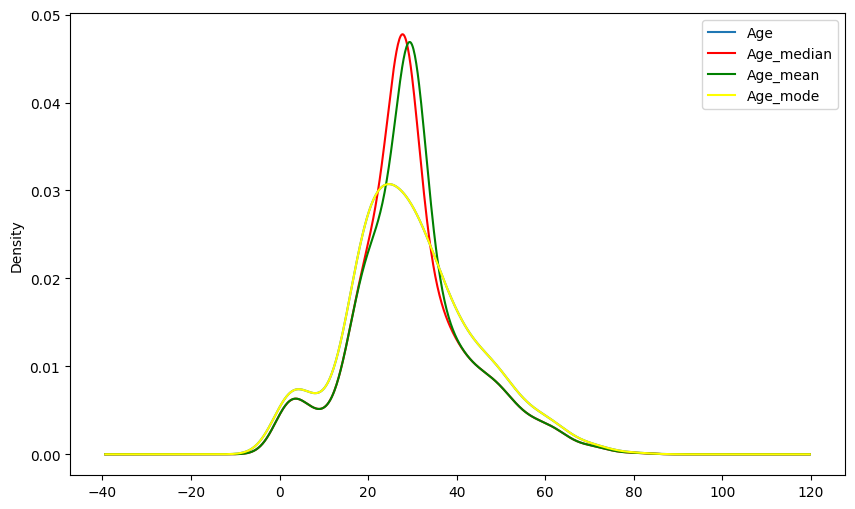

In [55]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
data_titanic['Age'].plot(kind='kde', ax=ax)
data_titanic.Age_median.plot(kind='kde', ax=ax, color='red')
data_titanic.Age_mean.plot(kind='kde', ax=ax, color='green')
data_titanic.Age_mode.plot(kind='kde', ax=ax, color='yellow')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages:
- Easy to implement (Robust to outliers)
- Faster way to fill missing values
### Disadvantages:
- change or distortion in the distribution of the data from original (variance/standard deviation)
- impacts correlation

## Random Sample Imputation (MCAR)

In [32]:
dataset = pd.read_csv("data/titanic.csv",  delimiter=",", usecols=['Age','Fare','Survived'])
dataset.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [33]:
dataset.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [34]:
dataset.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [39]:
dataset['Age'].dropna().sample(dataset['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [40]:
def impute_nan(df,variable,median):
    df[variable + '_median'] = df[variable].fillna(median)
    df[variable + '_random'] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random'] = random_sample

In [41]:
impute_nan(dataset,'Age',median_value)

In [42]:
print(dataset['Age'].std())
print(dataset['Age_median'].std())
print(dataset['Age_random'].std())

14.526497332334042
13.019696550973201
14.56365408956869


In [44]:
dataset.columns

Index(['Survived', 'Age', 'Fare', 'Age_median', 'Age_random'], dtype='object')

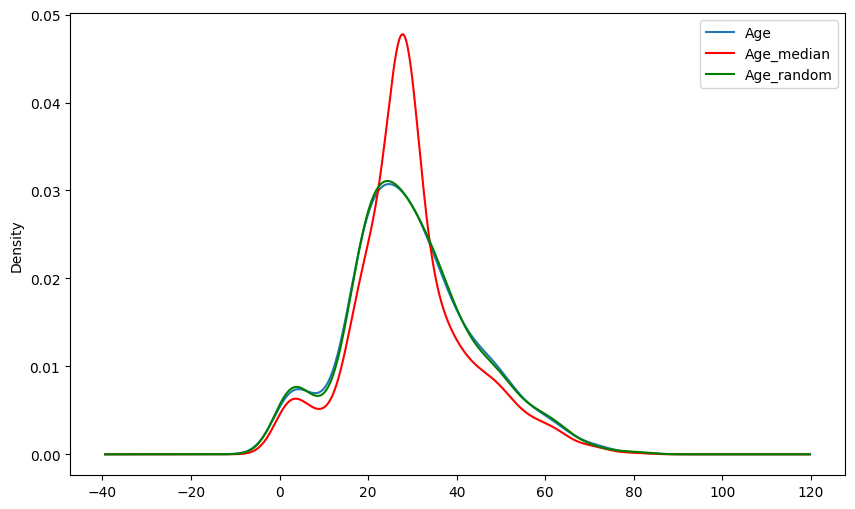

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
dataset['Age'].plot(kind='kde', ax=ax)
dataset.Age_median.plot(kind='kde', ax=ax, color='red')
dataset.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
- Easy to implement
- Less distortion in the distribution of the dataset


### Disadvantages
- Not Robust to outliers (Random Sample picked can be an outlier value)
- Wont work for every situation

## Capturing NAN values with a new feature column + Frequent Category Imputation / Median / Mode/ Mean (MNAR)


In [56]:
data = pd.read_csv("data/titanic.csv", delimiter=',', usecols=['Survived','Age','Fare'])
data.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [57]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [58]:
data['Age_NAN'] = np.where(data['Age'].isnull(), 1,0)
data.head(3)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0


In [60]:
data['Age_NAN'].value_counts()

Age_NAN
0    714
1    177
Name: count, dtype: int64

In [61]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
Age_NAN       0
dtype: int64

In [63]:
median_value = data['Age'].median()
median_value

28.0

In [64]:
data['Age'] = data['Age'].fillna(median_value)

In [65]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
Age_NAN     0
dtype: int64

In [67]:
data.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


## Advantages:
- Easy to implement
- Captures the importance of missing values

## Disadvantages:
- Increase the number of features (curse of dimensionality)

## End of Distribution Imputation (MNAR)

In [87]:
dataset = pd.read_csv("data/titanic.csv", delimiter=",", usecols=['Age','Survived','Fare'])
dataset.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


<Axes: >

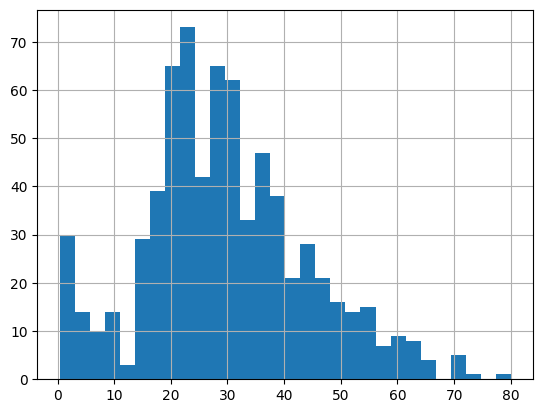

In [88]:
dataset['Age'].hist(bins=30)

In [94]:
eod = dataset.Age.mean()+3*dataset.Age.std()
median = dataset.Age.median()

<Axes: xlabel='Age'>

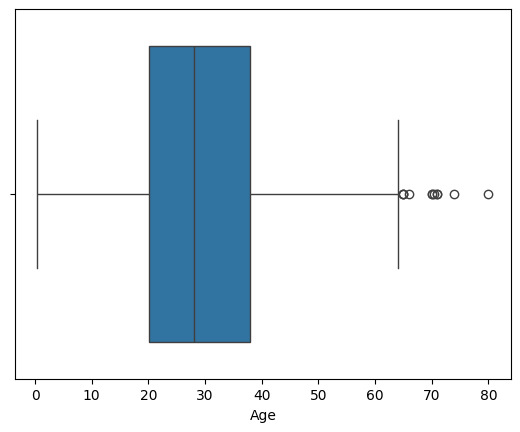

In [95]:
import seaborn as sns
sns.boxplot(x='Age',data=dataset)

In [96]:
dataset['Age' + '_eod'] = dataset['Age'].fillna(eod)
dataset['Age' + '_median'] = dataset['Age'].fillna(median)

In [97]:
dataset.columns

Index(['Survived', 'Age', 'Fare', 'Age_eod', 'Age_median'], dtype='object')

In [98]:
dataset.isnull().sum()

Survived        0
Age           177
Fare            0
Age_eod         0
Age_median      0
dtype: int64

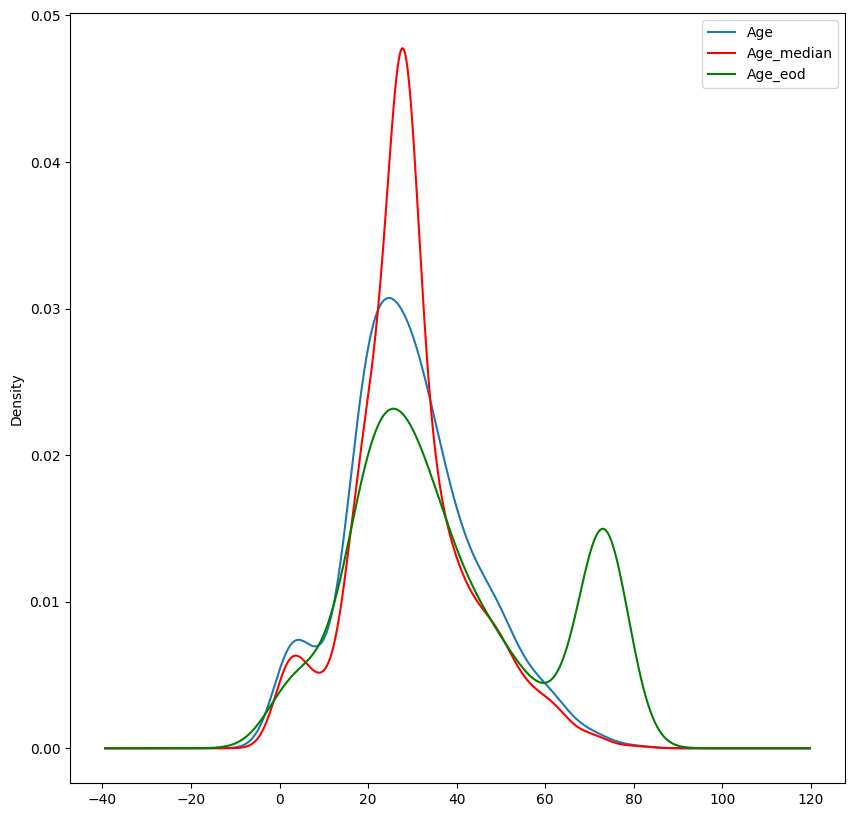

In [100]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
dataset.Age.plot(kind="kde", ax=ax)
dataset.Age_median.plot(kind="kde", ax=ax, color='red')
dataset.Age_eod.plot(kind="kde", ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels,loc='best')

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Age_eod'}>],
       [<Axes: title={'center': 'Age_median'}>, <Axes: >]], dtype=object)

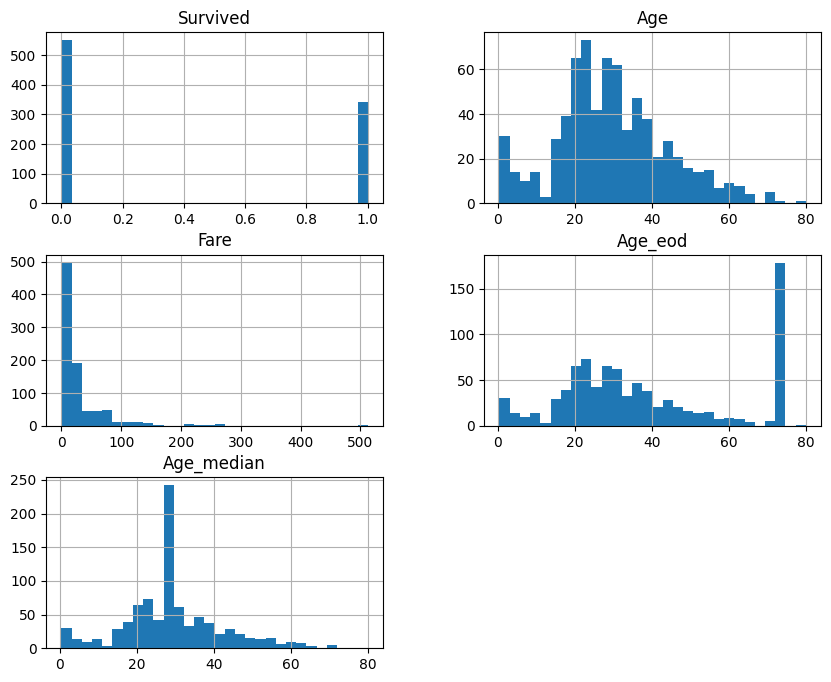

In [108]:

dataset.hist(bins=30, figsize=(10, 8))

<Axes: xlabel='Age_eod'>

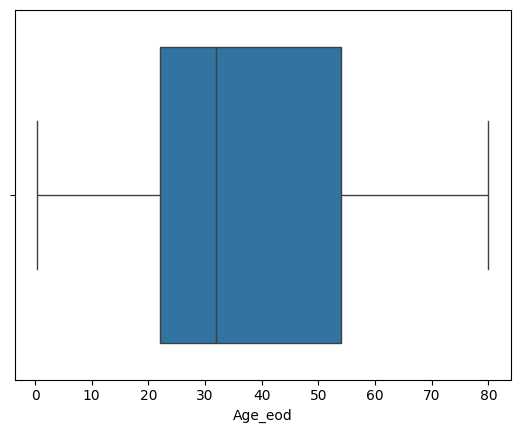

In [109]:
sns.boxplot(x='Age_eod', data=dataset)

### Advantages:
- Easy to implement
- Capture the importance of missing values

### Disadvantages:
- Distorts the original distribution
- if missing values are high, then outliers will be mostly present in the distribution
- if missing values are low, then the replaced missing values will be removed as outlier during preprocessing.

## Arbitrary Imputation

In [110]:
data = pd.read_csv("data/titanic.csv", usecols=['Age','Survived','Fare'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<Axes: >

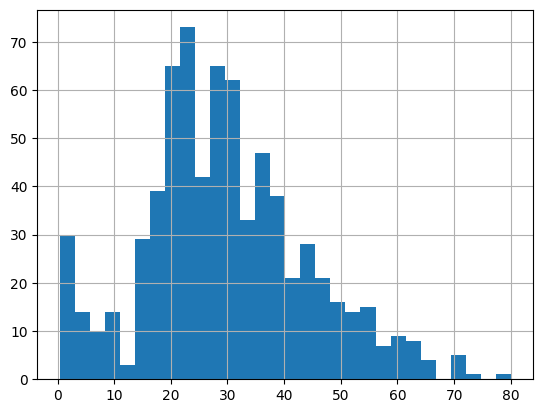

In [111]:
data.Age.hist(bins=30)

In [112]:
def impute_nan(df,variable):
    df[variable + '_median'] = df[variable].fillna(df[variable].median())
    df[variable + '_zero'] = df[variable].fillna(0)
    df[variable + '_hundred'] = df[variable].fillna(100)

In [113]:
impute_nan(data,'Age')

In [114]:
data.columns

Index(['Survived', 'Age', 'Fare', 'Age_median', 'Age_zero', 'Age_hundred'], dtype='object')

In [116]:
data.head(10)

,Survived,Age,Fare,Age_median,Age_zero,Age_hundred
0,0,22.0,7.2500,22.0,22.0,22.0
1,1,38.0,71.2833,38.0,38.0,38.0
2,1,26.0,7.9250,26.0,26.0,26.0
3,1,35.0,53.1000,35.0,35.0,35.0
4,0,35.0,8.0500,35.0,35.0,35.0
5,0,NaN,8.4583,28.0,0.0,100.0
6,0,54.0,51.8625,54.0,54.0,54.0
7,0,2.0,21.0750,2.0,2.0,2.0
8,1,27.0,11.1333,27.0,27.0,27.0
9,1,14.0,30.0708,14.0,14.0,14.0


<Axes: xlabel='Age_zero'>

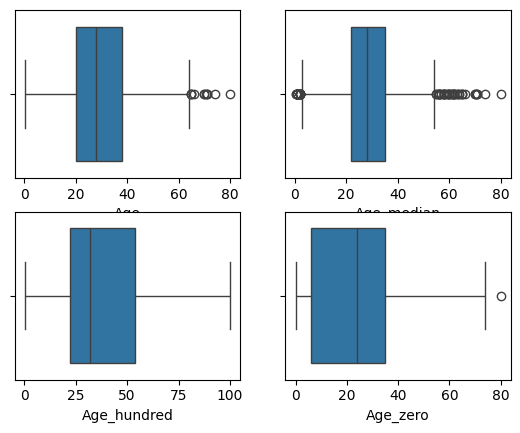

In [122]:
fig = plt.Figure(figsize=(10,8))
sns.boxplot(x='Age', data=data, ax=plt.subplot(2,2,1))
sns.boxplot(x='Age_median', data=data, ax=plt.subplot(2,2,2))
sns.boxplot(x='Age_hundred', data=data, ax=plt.subplot(2,2,3))
sns.boxplot(x='Age_zero', data=data, ax=plt.subplot(2,2,4))

### Advantages:
- Easy to implement
- captures the importance of missing values

### Disadvantages:
- distorts the orginal distribution
- hard to chose which value to choose

## Frequent Category Imputation

In [123]:
data = pd.read_csv("data/titanic.csv", usecols=['Embarked','Survived','Cabin'])
data.head(5)

,Survived,Cabin,Embarked
0,0,NaN,S
1,1,C85,C
2,1,NaN,S
3,1,C123,S
4,0,NaN,S


In [124]:
data.isnull().sum()

Survived      0
Cabin       687
Embarked      2
dtype: int64

In [125]:
data.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [126]:
data.Embarked = data.Embarked.fillna('S')

In [127]:
data.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [128]:
data = pd.read_csv("data/loan.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [129]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [130]:
data.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [133]:
data['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

<Axes: xlabel='GarageType'>

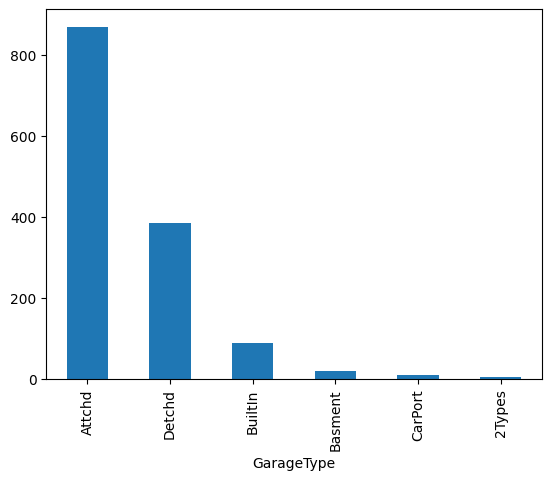

In [143]:
data['GarageType'].value_counts().sort_values(ascending=False).plot(kind='bar',)

In [137]:
data.groupby("BsmtQual")['BsmtQual'].value_counts()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: count, dtype: int64

<Axes: xlabel='BsmtQual'>

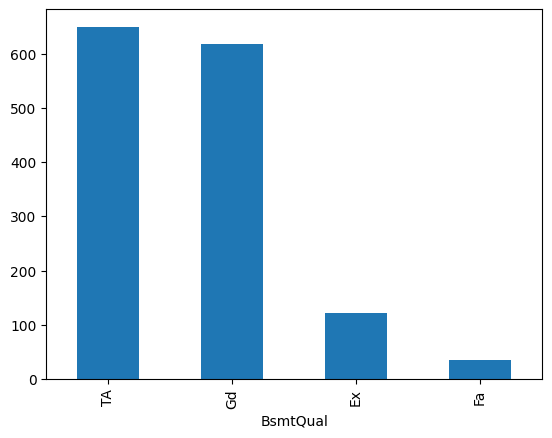

In [142]:
data.groupby("BsmtQual")['BsmtQual'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [144]:
def impute_nan(df,variable):
    freq_value = df[variable].value_counts().index[0]
    df[variable+'_frequent'] = df[variable].fillna(freq_value)


In [145]:
impute_nan(data,'BsmtQual')
impute_nan(data,'GarageType')

In [146]:
data.columns

Index(['BsmtQual', 'FireplaceQu', 'GarageType', 'SalePrice',
       'BsmtQual_frequent', 'GarageType_frequent'],
      dtype='object')

In [150]:
data.isnull().sum()

BsmtQual                37
FireplaceQu            690
GarageType              81
SalePrice                0
BsmtQual_frequent        0
GarageType_frequent      0
dtype: int64

In [151]:
data['BsmtQual'].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [152]:
data['BsmtQual_frequent'].value_counts()

BsmtQual_frequent
TA    686
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [153]:
data['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [154]:
data['GarageType_frequent'].value_counts()

GarageType_frequent
Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

### Advantages:
- Easy to implement.
- captures the missing values

### Disadvantages:
-  Not suitable for all types of data (if NAN values more then frequent labels will be present more)
- distorts the relation of most frequent labels

## KNN Imputation (Multivariate) 
### cannot use categorical variable as input

In [169]:
data = pd.read_csv("data/titanic.csv", usecols=['Age','Survived','Fare'])
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [170]:
data.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [171]:
data.head(30)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [173]:
from sklearn.impute import KNNImputer
imputer =  KNNImputer(missing_values=np.nan, n_neighbors=3)
data['Age'] = imputer.fit_transform(data[['Age']])

In [174]:
data.head(30)

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
5,0,29.699118,8.4583
6,0,54.000000,51.8625
7,0,2.000000,21.0750
8,1,27.000000,11.1333
9,1,14.000000,30.0708


In [175]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

## Iterative Imputation (Multivariate)
### cannot use categorical variable as input

In [215]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

In [216]:
data = pd.read_csv("data/titanic.csv", usecols=['Age','Survived','Fare'])
data.head(20)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
5,0,NaN,8.4583
6,0,54.0,51.8625
7,0,2.0,21.0750
8,1,27.0,11.1333
9,1,14.0,30.0708


In [217]:
imputer = IterativeImputer(DecisionTreeRegressor(), missing_values=np.NaN)
data = imputer.fit_transform(data)

In [218]:
dataset = pd.DataFrame(data)
dataset.head(30)

,0,1,2
0,0.0,22.000000,7.2500
1,1.0,38.000000,71.2833
2,1.0,26.000000,7.9250
3,1.0,35.000000,53.1000
4,0.0,35.000000,8.0500
5,0.0,21.000000,8.4583
6,0.0,54.000000,51.8625
7,0.0,2.000000,21.0750
8,1.0,27.000000,11.1333
9,1.0,14.000000,30.0708


In [219]:
dataset.columns = [['Survived','Age','Fare']]

In [220]:
dataset

,Survived,Age,Fare
0,0.0,22.0,7.2500
1,1.0,38.0,71.2833
2,1.0,26.0,7.9250
3,1.0,35.0,53.1000
4,0.0,35.0,8.0500
...,...,...,...
886,0.0,27.0,13.0000
887,1.0,19.0,30.0000
888,0.0,30.0,23.4500
889,1.0,26.0,30.0000


In [221]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   (Survived,)  891 non-null    float64
 1   (Age,)       891 non-null    float64
 2   (Fare,)      891 non-null    float64
dtypes: float64(3)
memory usage: 21.0 KB


## New label for missing values Imputation

In [155]:
data = pd.read_csv("data/loan.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
data.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [156]:
data.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [158]:
data['BsmtQual'].value_counts().sort_values(ascending=False)

BsmtQual
TA    649
Gd    618
Ex    121
Fa     35
Name: count, dtype: int64

In [159]:
data['GarageType'].value_counts().sort_values(ascending=False)

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [160]:
data['BsmtQual'].fillna('missing', inplace=True)
data['GarageType'].fillna('missing', inplace=True)

/var/folders/z1/8c8tjdhn2z740qzvlw8cs1f80000gn/T/ipykernel_1181/1454567244.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['GarageType'].fillna('missing', inplace=True)


In [161]:
data.isnull().sum()

BsmtQual         0
FireplaceQu    690
GarageType       0
SalePrice        0
dtype: int64

In [162]:
data['GarageType'].value_counts().sort_values(ascending=False)

GarageType
Attchd     870
Detchd     387
BuiltIn     88
missing     81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [163]:
data['BsmtQual'].value_counts().sort_values(ascending=False)

BsmtQual
TA         649
Gd         618
Ex         121
missing     37
Fa          35
Name: count, dtype: int64